In [ ]:
!pip install Pillow -U

Requirement already up-to-date: Pillow in /usr/local/lib/python3.7/dist-packages (8.2.0)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/DATASET/train2014.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2014/COCO_train2014_000000408557.jpg  
 extracting: train2014/COCO_train2014_000000013714.jpg  
 extracting: train2014/COCO_train2014_000000194043.jpg  
 extracting: train2014/COCO_train2014_000000219859.jpg  
 extracting: train2014/COCO_train2014_000000278135.jpg  
 extracting: train2014/COCO_train2014_000000141015.jpg  
 extracting: train2014/COCO_train2014_000000280923.jpg  
 extracting: train2014/COCO_train2014_000000200024.jpg  
 extracting: train2014/COCO_train2014_000000435713.jpg  
 extracting: train2014/COCO_train2014_000000249993.jpg  
 extracting: train2014/COCO_train2014_000000424160.jpg  
 extracting: train2014/COCO_train2014_000000142761.jpg  
 extracting: train2014/COCO_train2014_000000532668.jpg  
 extracting: train2014/COCO_train2014_000000564904.jpg  
 extracting: train2014/COCO_train2014_000000346384.jpg  
 extracting: train2014/COCO_train2014_000000560934.jpg  
 extracting: train2014/COCO_train2014

In [ ]:
%matplotlib inline

# download and unzip dataset o train
!wget http://images.cocodataset.org/zips/train2014.zip
!mkdir train
%cd /content/train
!unzip -qq /content/train2014.zip
%cd ..

#download model
!wget https://web.eecs.umich.edu/~justincj/models/vgg16-00b39a1b.pth
  
# download helper code
!wget https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/transformer.py
!wget https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/utils.py
!wget https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/vgg.py

# download style image  
# !wget https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/images/mosaic.jpg

--2021-06-20 09:29:58--  https://web.eecs.umich.edu/~justincj/models/vgg16-00b39a1b.pth
Resolving web.eecs.umich.edu (web.eecs.umich.edu)... 141.212.113.214
Connecting to web.eecs.umich.edu (web.eecs.umich.edu)|141.212.113.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 553451520 (528M) [application/x-tar]
Saving to: ‘vgg16-00b39a1b.pth’

vgg16-00b39a1b.pth  100%[===================>] 527.81M  51.8MB/s    in 11s     

2021-06-20 09:30:09 (47.5 MB/s) - ‘vgg16-00b39a1b.pth’ saved [553451520/553451520]

--2021-06-20 09:30:09--  https://raw.githubusercontent.com/iamRusty/fast-neural-style-pytorch/master/transformer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4660 (4.6K) [text/plain]
Saving to: ‘transformer.py’

transformer.py

In [ ]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import random
import numpy as np
import time
import vgg
import transformer
import utils  

### Check hidden file

In [ ]:
# Remove file 

# path = '/content/train'
# x = os.listdir(path)
# os.removedirs('/content/train/.ipynb_checkpoints/')

In [ ]:
# GLOBAL SETTINGS
TRAIN_IMAGE_SIZE = 256
DATASET_PATH = "/content/train"  # đường dẫn training dataset

NUM_EPOCHS = 1
STYLE_IMAGE_PATH = "/content/drive/MyDrive/NST/style/circuit.jpg"   # đường dẫn style image
BATCH_SIZE = 4 
CONTENT_WEIGHT = 17
STYLE_WEIGHT = 50
TV_WEIGHT = 1e-6 
ADAM_LR = 0.001
SAVE_IMAGE_PATH = "/content/drive/MyDrive/temp/image_result/"
SAVE_MODEL_EVERY = 500 # 2,000 Images with batch size 4
SEED = 35 

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


========Epoch 1/2========
========Iteration 1/20696========
	Content Loss:	2917063.75
	Style Loss:	62283824.00
	Total Loss:	65200888.00
Time elapsed:	0.35327887535095215 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_0.pth


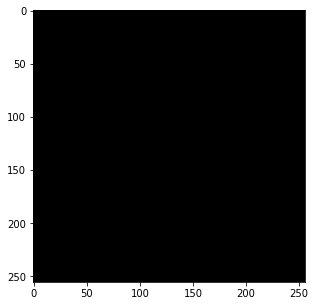

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_0.png
========Iteration 501/20696========
	Content Loss:	4101593.25
	Style Loss:	8242739.00
	Total Loss:	12344335.90
Time elapsed:	112.40410351753235 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_500.pth


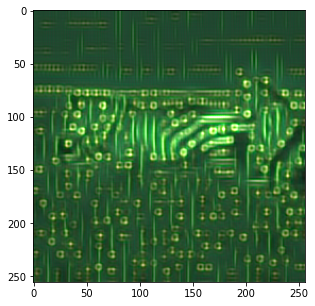

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_500.png
========Iteration 1001/20696========
	Content Loss:	3767956.25
	Style Loss:	4662733.50
	Total Loss:	8430691.92
Time elapsed:	229.92567443847656 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_1000.pth


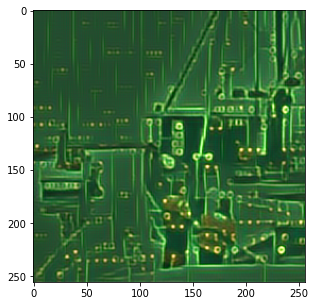

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_1000.png
========Iteration 1501/20696========
	Content Loss:	3499820.50
	Style Loss:	3394597.00
	Total Loss:	6894424.13
Time elapsed:	350.30502676963806 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_1500.pth


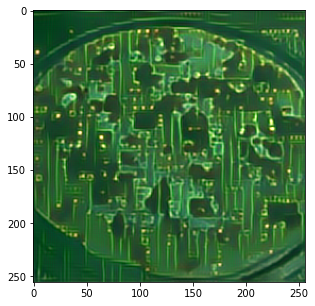

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_1500.png
========Iteration 2001/20696========
	Content Loss:	3320711.50
	Style Loss:	2745527.00
	Total Loss:	6066242.78
Time elapsed:	471.5902349948883 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_2000.pth


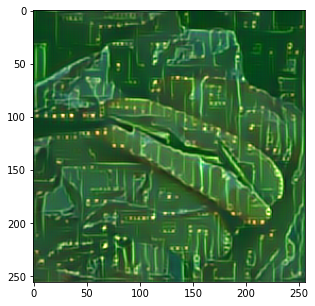

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_2000.png
========Iteration 2501/20696========
	Content Loss:	3187115.50
	Style Loss:	2345244.75
	Total Loss:	5532363.84
Time elapsed:	592.7822868824005 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_2500.pth


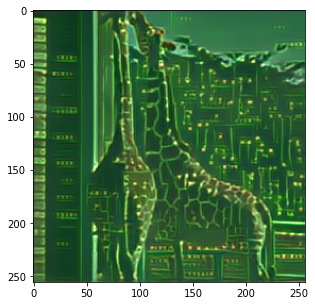

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_2500.png
========Iteration 3001/20696========
	Content Loss:	3090712.50
	Style Loss:	2076406.62
	Total Loss:	5167120.19
Time elapsed:	713.9147853851318 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_3000.pth


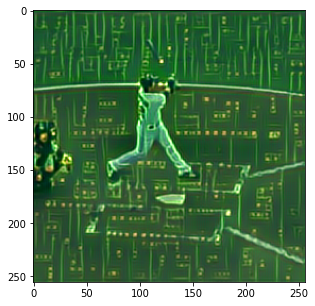

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_3000.png
========Iteration 3501/20696========
	Content Loss:	3017113.50
	Style Loss:	1881138.62
	Total Loss:	4898253.24
Time elapsed:	834.87628698349 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_3500.pth


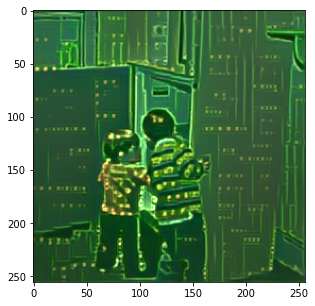

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_3500.png
========Iteration 4001/20696========
	Content Loss:	2957560.50
	Style Loss:	1732665.00
	Total Loss:	4690228.31
Time elapsed:	956.0199444293976 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_4000.pth


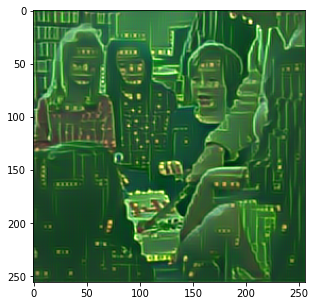

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_4000.png
========Iteration 4501/20696========
	Content Loss:	2907394.75
	Style Loss:	1615294.88
	Total Loss:	4522692.17
Time elapsed:	1076.8552856445312 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_4500.pth


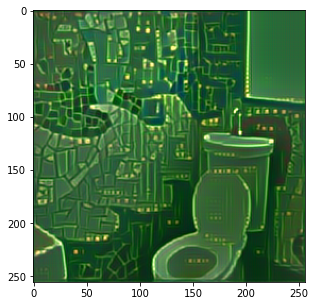

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_4500.png
========Iteration 5001/20696========
	Content Loss:	2865987.00
	Style Loss:	1520076.75
	Total Loss:	4386068.20
Time elapsed:	1197.6159138679504 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_5000.pth


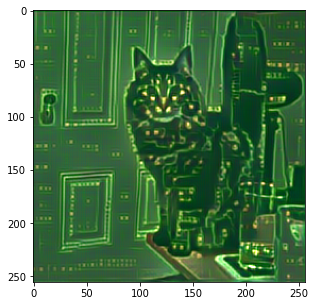

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_5000.png
========Iteration 5501/20696========
	Content Loss:	2829386.75
	Style Loss:	1441312.50
	Total Loss:	4270703.71
Time elapsed:	1318.220332145691 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_5500.pth


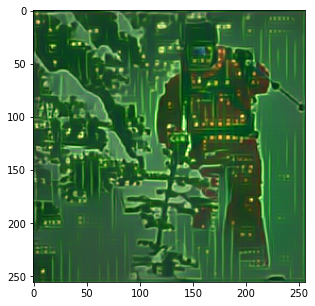

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_5500.png
========Iteration 6001/20696========
	Content Loss:	2798613.00
	Style Loss:	1375377.75
	Total Loss:	4173994.92
Time elapsed:	1438.7974274158478 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_6000.pth


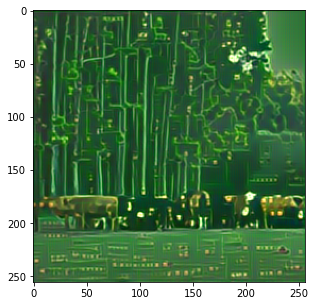

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_6000.png
========Iteration 6501/20696========
	Content Loss:	2771973.75
	Style Loss:	1319215.00
	Total Loss:	4091191.83
Time elapsed:	1559.6150028705597 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_6500.pth


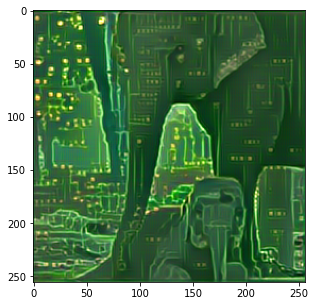

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_6500.png
========Iteration 7001/20696========
	Content Loss:	2747495.50
	Style Loss:	1270590.25
	Total Loss:	4018090.10
Time elapsed:	1680.5337538719177 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_7000.pth


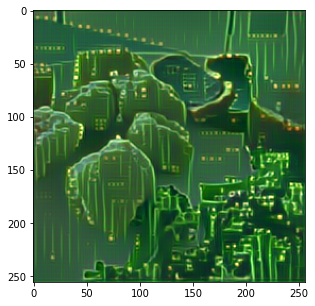

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_7000.png
========Iteration 7501/20696========
	Content Loss:	2725117.00
	Style Loss:	1228090.38
	Total Loss:	3953209.85
Time elapsed:	1801.1155843734741 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_7500.pth


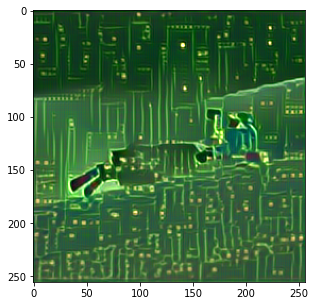

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_7500.png
========Iteration 8001/20696========
	Content Loss:	2705523.00
	Style Loss:	1190593.88
	Total Loss:	3896119.28
Time elapsed:	1921.7741000652313 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_8000.pth


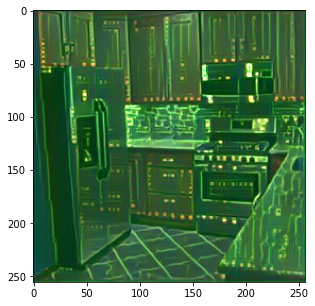

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_8000.png
========Iteration 8501/20696========
	Content Loss:	2689127.25
	Style Loss:	1157338.00
	Total Loss:	3846469.09
Time elapsed:	2042.4134814739227 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_8500.pth


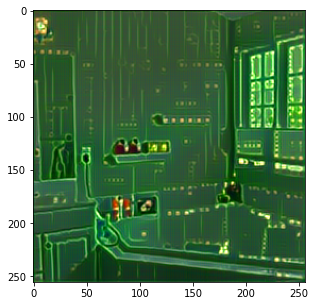

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_8500.png
========Iteration 9001/20696========
	Content Loss:	2674926.75
	Style Loss:	1128970.88
	Total Loss:	3803900.34
Time elapsed:	2162.963219642639 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_9000.pth


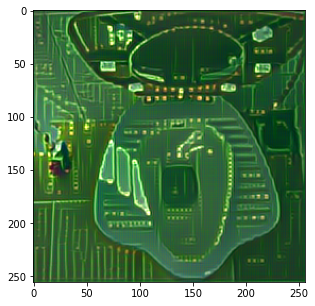

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_9000.png
========Iteration 9501/20696========
	Content Loss:	2661458.00
	Style Loss:	1102441.50
	Total Loss:	3763902.33
Time elapsed:	2283.6286447048187 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_9500.pth


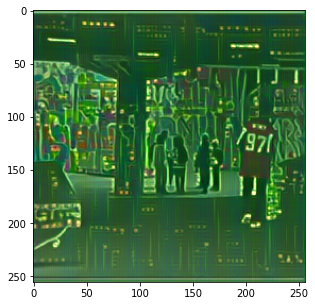

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_9500.png
========Iteration 10001/20696========
	Content Loss:	2649017.75
	Style Loss:	1078085.62
	Total Loss:	3727104.76
Time elapsed:	2404.4450097084045 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_10000.pth


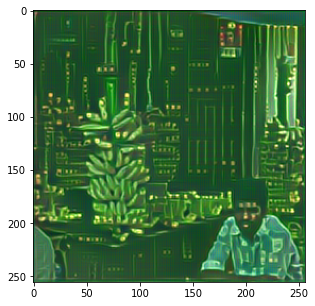

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_10000.png
========Iteration 10501/20696========
	Content Loss:	2637279.25
	Style Loss:	1055892.88
	Total Loss:	3693172.70
Time elapsed:	2525.1316039562225 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_10500.pth


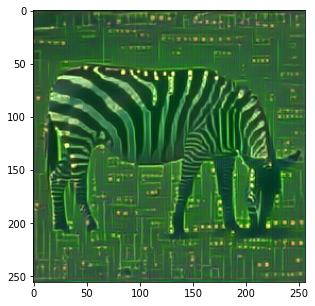

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_10500.png
========Iteration 11001/20696========
	Content Loss:	2626291.25
	Style Loss:	1035876.06
	Total Loss:	3662168.93
Time elapsed:	2645.5533924102783 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_11000.pth


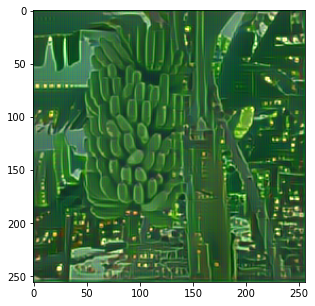

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_11000.png
========Iteration 11501/20696========
	Content Loss:	2616451.50
	Style Loss:	1017328.81
	Total Loss:	3633783.49
Time elapsed:	2766.284946203232 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_11500.pth


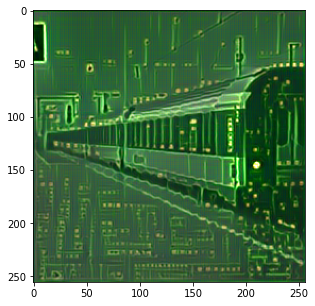

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_11500.png
========Iteration 12001/20696========
	Content Loss:	2607413.25
	Style Loss:	1000064.50
	Total Loss:	3607481.07
Time elapsed:	2886.898956298828 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_12000.pth


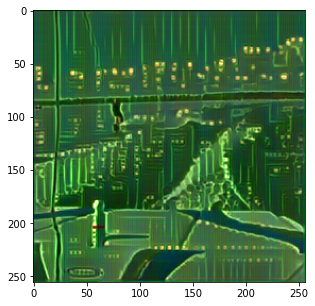

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_12000.png
========Iteration 12501/20696========
	Content Loss:	2598290.25
	Style Loss:	984214.69
	Total Loss:	3582509.69
Time elapsed:	3007.358994960785 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_12500.pth


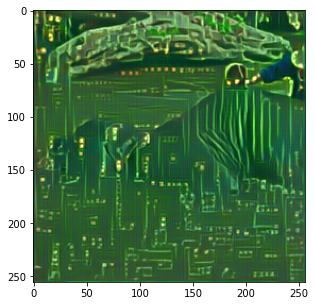

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_12500.png
========Iteration 13001/20696========
	Content Loss:	2589909.75
	Style Loss:	969588.88
	Total Loss:	3559502.60
Time elapsed:	3128.085755586624 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_13000.pth


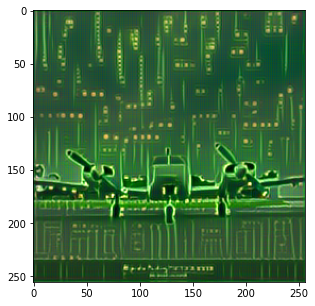

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_13000.png
========Iteration 13501/20696========
	Content Loss:	2581596.50
	Style Loss:	955909.50
	Total Loss:	3537509.22
Time elapsed:	3248.530304670334 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_13500.pth


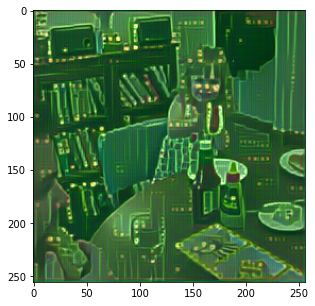

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_13500.png
========Iteration 14001/20696========
	Content Loss:	2573658.00
	Style Loss:	943170.62
	Total Loss:	3516829.48
Time elapsed:	3369.0684349536896 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_14000.pth


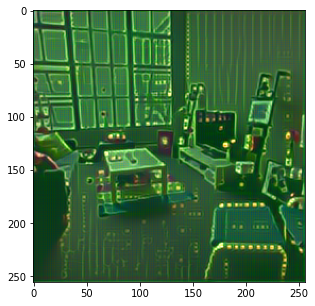

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_14000.png
========Iteration 14501/20696========
	Content Loss:	2566397.50
	Style Loss:	931351.56
	Total Loss:	3497748.16
Time elapsed:	3489.475703239441 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_14500.pth


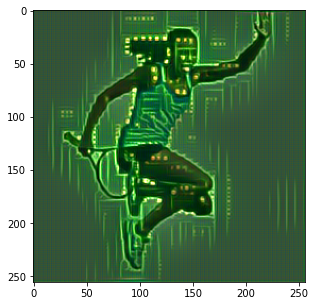

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_14500.png
========Iteration 15001/20696========
	Content Loss:	2560245.00
	Style Loss:	920459.44
	Total Loss:	3480701.76
Time elapsed:	3610.091411590576 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_15000.pth


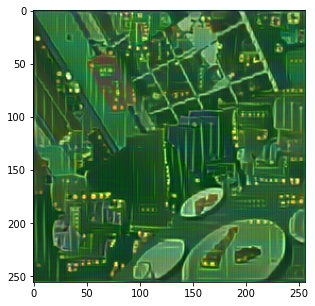

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_15000.png
========Iteration 15501/20696========
	Content Loss:	2553846.50
	Style Loss:	910005.06
	Total Loss:	3463850.77
Time elapsed:	3730.61648273468 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_15500.pth


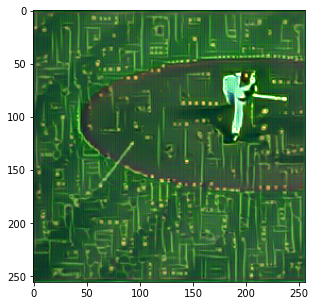

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_15500.png
========Iteration 16001/20696========
	Content Loss:	2548395.00
	Style Loss:	900155.25
	Total Loss:	3448552.57
Time elapsed:	3851.1841559410095 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_16000.pth


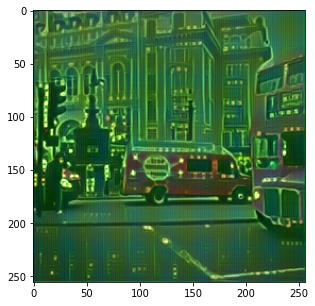

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_16000.png
========Iteration 16501/20696========
	Content Loss:	2542138.50
	Style Loss:	890807.00
	Total Loss:	3432948.64
Time elapsed:	3971.8961310386658 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_16500.pth


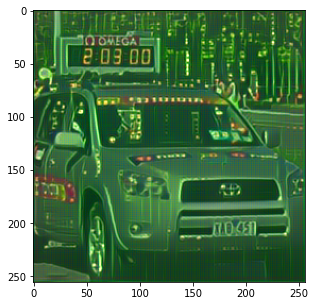

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_16500.png
========Iteration 17001/20696========
	Content Loss:	2536565.50
	Style Loss:	881974.56
	Total Loss:	3418542.64
Time elapsed:	4092.4923169612885 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_17000.pth


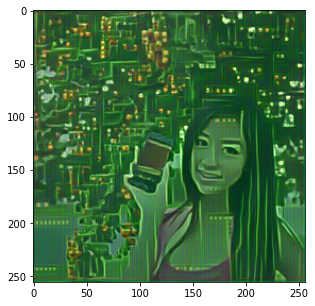

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_17000.png
========Iteration 17501/20696========
	Content Loss:	2531103.50
	Style Loss:	873711.00
	Total Loss:	3404817.58
Time elapsed:	4212.81174325943 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_17500.pth


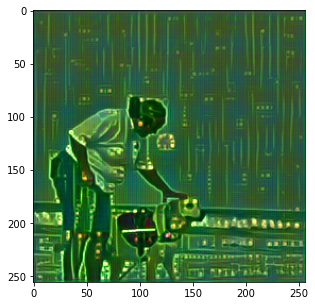

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_17500.png
========Iteration 18001/20696========
	Content Loss:	2525850.00
	Style Loss:	865715.19
	Total Loss:	3391569.31
Time elapsed:	4333.580294132233 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_18000.pth


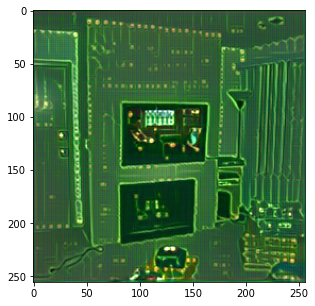

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_18000.png
========Iteration 18501/20696========
	Content Loss:	2520518.25
	Style Loss:	858203.81
	Total Loss:	3378727.88
Time elapsed:	4454.293466329575 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_18500.pth


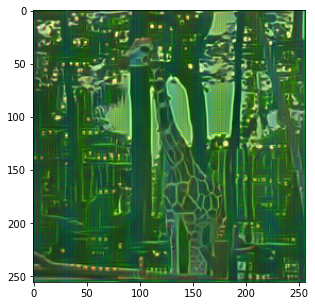

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_18500.png
========Iteration 19001/20696========
	Content Loss:	2515914.00
	Style Loss:	851014.25
	Total Loss:	3366933.53
Time elapsed:	4574.824642896652 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_19000.pth


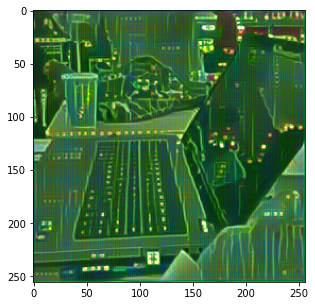

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_19000.png
========Iteration 19501/20696========
	Content Loss:	2511213.00
	Style Loss:	844008.88
	Total Loss:	3355224.54
Time elapsed:	4695.618859052658 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_19500.pth


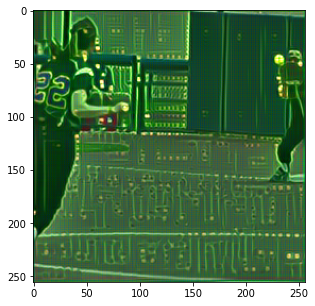

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_19500.png
========Iteration 20001/20696========
	Content Loss:	2506951.25
	Style Loss:	837533.81
	Total Loss:	3344485.14
Time elapsed:	4816.239208698273 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_20000.pth


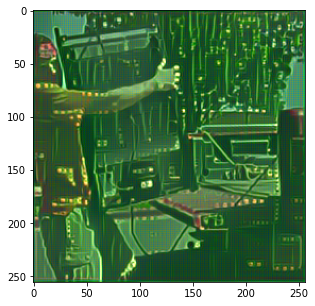

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_20000.png
========Iteration 20501/20696========
	Content Loss:	2503360.50
	Style Loss:	831376.31
	Total Loss:	3334735.90
Time elapsed:	4937.011030197144 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_20500.pth


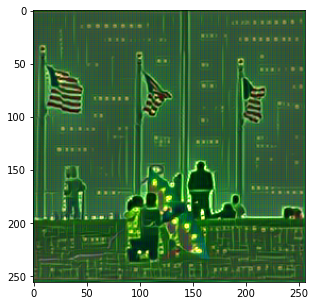

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_20500.png
========Iteration 20696/20696========
	Content Loss:	2501754.25
	Style Loss:	829065.31
	Total Loss:	3330819.97
Time elapsed:	4984.249240398407 seconds
Saved TransformerNetwork checkpoint file at /content/drive/MyDrive/temp/model/checkpoint_20695.pth


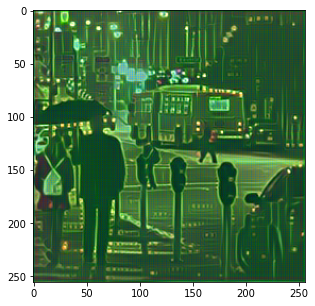

Saved sample tranformed image at /content/drive/MyDrive/temp/image_result/sample0_20695.png
Done Training the Transformer Network!
Training Time: 4984.495362520218 seconds
========Content Loss========
[65200888.0, 12344335.898203593, 8430691.91883117, 6894424.128414391, 6066242.778735632, 5532363.840663735, 5167120.194935022, 4898253.240002857, 4690228.314421395, 4522692.172183959, 4386068.198010398, 4270703.7119160155, 4173994.9152224627, 4091191.829949239, 4018090.096057706, 3953209.8505865885, 3896119.2826521685, 3846469.0907834372, 3803900.341600933, 3763902.326202505, 3727104.763473653, 3693172.7043614895, 3662168.9301654394, 3633783.4876315105, 3607481.0747437715, 3582509.6883049356, 3559502.6017998615, 3537509.2232242054, 3516829.478715806, 3497748.161644025, 3480701.7645323644, 3463850.7747564674, 3448552.565011562, 3432948.63553724, 3418542.643212164, 3404817.5825524256, 3391569.313093717, 3378727.883803578, 3366933.5295510762, 3355224.536626327, 3344485.1359932004, 3334735.90

In [ ]:
def train():
    # Seeds
    torch.manual_seed(SEED)
    torch.cuda.manual_seed(SEED)
    np.random.seed(SEED)
    random.seed(SEED)

    # Device
    device = ("cuda" if torch.cuda.is_available() else "cpu")

    # Dataset and Dataloader
    transform = transforms.Compose([
        transforms.Resize(TRAIN_IMAGE_SIZE),
        transforms.CenterCrop(TRAIN_IMAGE_SIZE),
        transforms.ToTensor(),
        transforms.Lambda(lambda x: x.mul(255))
    ])
    train_dataset = datasets.ImageFolder(DATASET_PATH, transform=transform)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

    # Load networks
    TransformerNetwork = transformer.TransformerNetwork().to(device)
    VGG = vgg.VGG16('/content/vgg16-00b39a1b.pth').to(device)

    # Get Style Features
    imagenet_neg_mean = torch.tensor([-103.939, -116.779, -123.68], dtype=torch.float32).reshape(1,3,1,1).to(device)
    imagenet_mean = torch.tensor([103.939, 116.779, 123.68], dtype=torch.float32).reshape(1,3,1,1).to(device)
    style_image = utils.load_image(STYLE_IMAGE_PATH)
    style_tensor = utils.itot(style_image).to(device)
    style_tensor = style_tensor.add(imagenet_neg_mean)
    B, C, H, W = style_tensor.shape
    style_features = VGG(style_tensor.expand([BATCH_SIZE, C, H, W]))
    style_gram = {}
    for key, value in style_features.items():
        style_gram[key] = utils.gram(value)

    # Optimizer settings
    optimizer = optim.Adam(TransformerNetwork.parameters(), lr=ADAM_LR)

    # Loss trackers
    content_loss_history = []
    style_loss_history = []
    total_loss_history = []
    batch_content_loss_sum = 0
    batch_style_loss_sum = 0
    batch_total_loss_sum = 0

    # Optimization/Training Loop
    batch_count = 1
    start_time = time.time()
    for epoch in range (1, NUM_EPOCHS+1):
        print("========Epoch {}/{}========".format(epoch, NUM_EPOCHS+1))
        for batch_id, (content_batch, _) in enumerate(train_loader):
            # Current Batch size in case of odd batches
            curr_batch_size = content_batch.shape[0]
            
            # Zero-out Gradients
            optimizer.zero_grad()

            # Generate images and get features
            content_batch = content_batch[:,[2,1,0]].to(device)
            generated_batch = TransformerNetwork(content_batch)
            content_features = VGG(content_batch.add(imagenet_neg_mean))
            generated_features = VGG(generated_batch.add(imagenet_neg_mean))

            # Content Loss
            MSELoss = nn.MSELoss().to(device)
            content_loss = CONTENT_WEIGHT * MSELoss(content_features['relu2_2'], generated_features['relu2_2'])            
            batch_content_loss_sum += content_loss

            # Style Loss
            style_loss = 0
            for key, value in generated_features.items():
                s_loss = MSELoss(utils.gram(value), style_gram[key][:curr_batch_size])
                style_loss += s_loss
            style_loss *= STYLE_WEIGHT
            batch_style_loss_sum += style_loss

            # Total Loss
            total_loss = content_loss + style_loss
            batch_total_loss_sum += total_loss.item()

            # Backprop and Weight Update
            total_loss.backward()
            optimizer.step()

            # Save Model and Print Losses
            if (((batch_count-1)%SAVE_MODEL_EVERY == 0) or (batch_count==NUM_EPOCHS*len(train_loader))):
                # Print Losses
                print("========Iteration {}/{}========".format(batch_count, NUM_EPOCHS*len(train_loader)))
                print("\tContent Loss:\t{:.2f}".format(batch_content_loss_sum/batch_count))
                print("\tStyle Loss:\t{:.2f}".format(batch_style_loss_sum/batch_count))
                print("\tTotal Loss:\t{:.2f}".format(batch_total_loss_sum/batch_count))
                print("Time elapsed:\t{} seconds".format(time.time()-start_time))

                # Save Model
                checkpoint_path = SAVE_MODEL_PATH + "checkpoint_" + str(batch_count-1) + ".pth"
                torch.save(TransformerNetwork.state_dict(), checkpoint_path)
                print("Saved TransformerNetwork checkpoint file at {}".format(checkpoint_path))

                # Save sample generated image
                sample_tensor = generated_batch[0].clone().detach().unsqueeze(dim=0)
                sample_image = utils.ttoi(sample_tensor.clone().detach())
                sample_image_path = SAVE_IMAGE_PATH + "sample0_" + str(batch_count-1) + ".png"
                utils.saveimg(sample_image, sample_image_path)
                utils.show(sample_image)
                print("Saved sample tranformed image at {}".format(sample_image_path))

                # Save loss histories
                content_loss_history.append(batch_total_loss_sum/batch_count)
                style_loss_history.append(batch_style_loss_sum/batch_count)
                total_loss_history.append(batch_total_loss_sum/batch_count)

            # Iterate Batch Counter
            batch_count+=1

    stop_time = time.time()
    # Print loss histories
    print("Done Training the Transformer Network!")
    print("Training Time: {} seconds".format(stop_time-start_time))
    print("========Content Loss========")
    print(content_loss_history) 
    print("========Style Loss========")
    print(style_loss_history) 
    print("========Total Loss========")
    print(total_loss_history) 

    # Save TransformerNetwork weights
    TransformerNetwork.eval()
    TransformerNetwork.cpu()
    final_path = SAVE_MODEL_PATH + "transformer_weight.pth"
    print("Saving TransformerNetwork weights at {}".format(final_path))
    torch.save(TransformerNetwork.state_dict(), final_path)
    print("Done saving final model")

train()